# Préparation des Données

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

x1 = pd.read_csv("../Ressources/Datasets/stand_norm_e1.txt", delimiter='\s+')
x2 = pd.read_csv("../Ressources/Datasets/stand_norm_e2.txt", delimiter='\s+')

y = pd.read_csv('../Ressources/Datasets/y2_e1.txt', header=None, names=['Target'], delimiter='\s+')

df = pd.concat([x1, x2, y], axis=1)
X = df.drop('Target', axis=1)
y = df['Target']


# Application de Feature Agglomeration

In [3]:
from sklearn.cluster import FeatureAgglomeration

# Initialiser l'agglomérateur de caractéristiques
agglo = FeatureAgglomeration(n_clusters=10)  # Choisissez un nombre de clusters approprié
X_reduced = agglo.fit_transform(X)

# X_reduced contient maintenant les caractéristiques agglomérées
print("Original feature space:", X.shape)
print("Reduced feature space:", X_reduced.shape)


Original feature space: (12810, 14)
Reduced feature space: (12810, 10)


# Intégration dans un Modèle de Machine Learning

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Entraînement d'un modèle RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.1546197111631538


# Visualisation de la Structure des Clusters

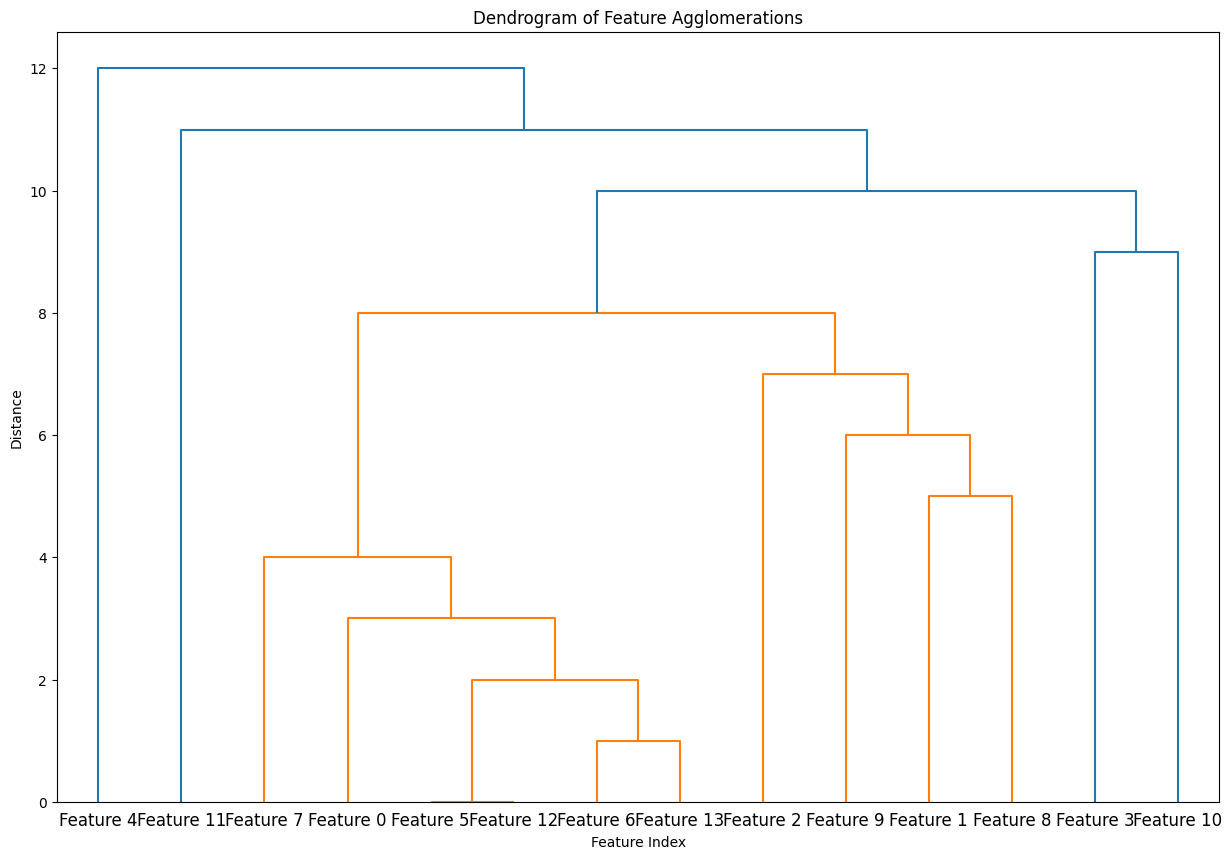

In [6]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np
# Fit the FeatureAgglomeration with connectivity constraints
agglo = FeatureAgglomeration(n_clusters=10)
agglo.fit(X)

# Visualiser le dendrogramme des caractéristiques agglomérées
children = agglo.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, p=X.shape[1], labels=[f'Feature {i}' for i in range(X.shape[1])], show_contracted=True)
plt.title('Dendrogram of Feature Agglomerations')
plt.xlabel('Feature Index')
plt.ylabel('Distance')
plt.show()


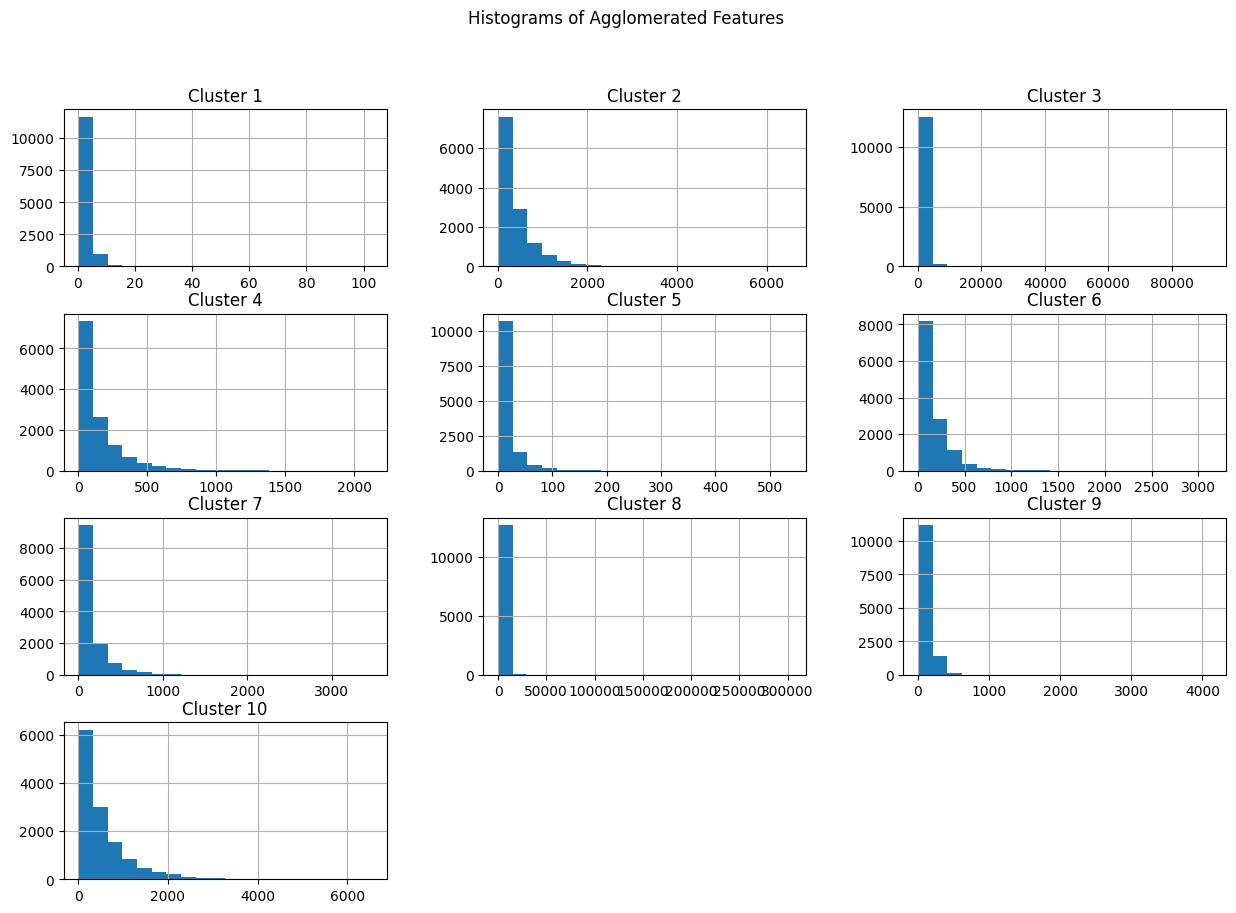

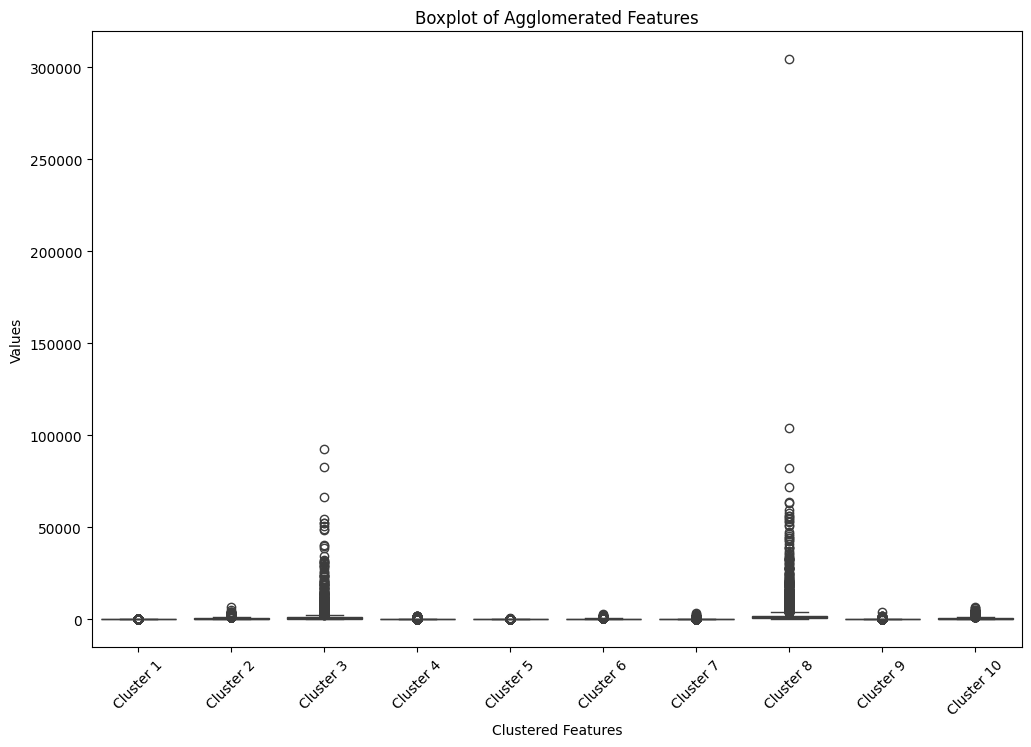

In [8]:

import seaborn as sns
# Transform the data using the fitted agglomerator
X_reduced = agglo.transform(X)

# Convert to DataFrame for easier plotting
X_reduced_df = pd.DataFrame(X_reduced, columns=[f'Cluster {i+1}' for i in range(X_reduced.shape[1])])

# Plot histograms
X_reduced_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Agglomerated Features')
plt.show()

# Plot box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_reduced_df)
plt.title('Boxplot of Agglomerated Features')
plt.xlabel('Clustered Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


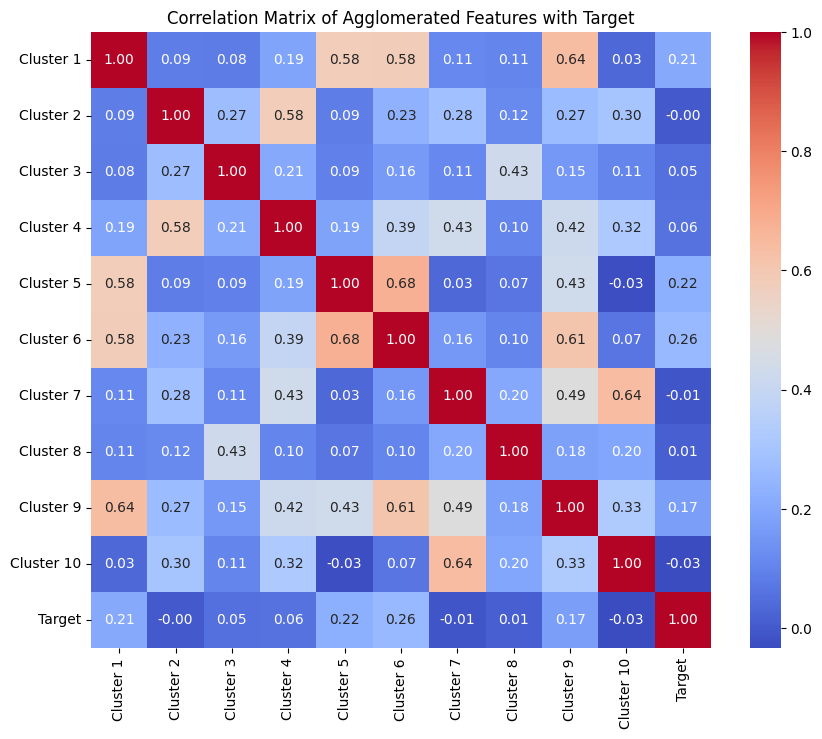

In [11]:
# Add the target back for correlation analysis
X_reduced_df['Target'] = y

# Compute the correlation matrix
corr_matrix = X_reduced_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Agglomerated Features with Target')
plt.show()
